In [1]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

# Use the Bayesian Methods for Hackers style
plt.style.use('bmh')
plt.rc('text', usetex=True)
matplotlib.rcParams.update({'font.size' : 20})

In [2]:
# Load the records containing the A' MC mass resolution measurements
mc_mr = np.genfromtxt("mc_mass_resolution.csv", 
                     dtype=[('mass', 'f8'), 
                            ('mass_error', 'f8'),
                            ('mass_sigma', 'f8'),
                            ('mass_sigma_error', 'f8')],
                     delimiter=","
                    )

# Load the records containing the Moller MC mass resolution measurement
moller_mc_mr = np.genfromtxt("moller_mc_mass_resolution.csv", 
                     dtype=[('mass', 'f8'), 
                            ('mass_error', 'f8'),
                            ('mass_sigma', 'f8'),
                            ('mass_sigma_error', 'f8')],
                     delimiter=","
                    )


# Load the record containing the Moller mass resolution measurement
data_mr = np.genfromtxt("data_mass_resolution.csv", 
                     dtype=[('mass', 'f8'), 
                            ('mass_error', 'f8'),
                            ('mass_sigma', 'f8'),
                            ('mass_sigma_error', 'f8')],
                     delimiter=","
                    )

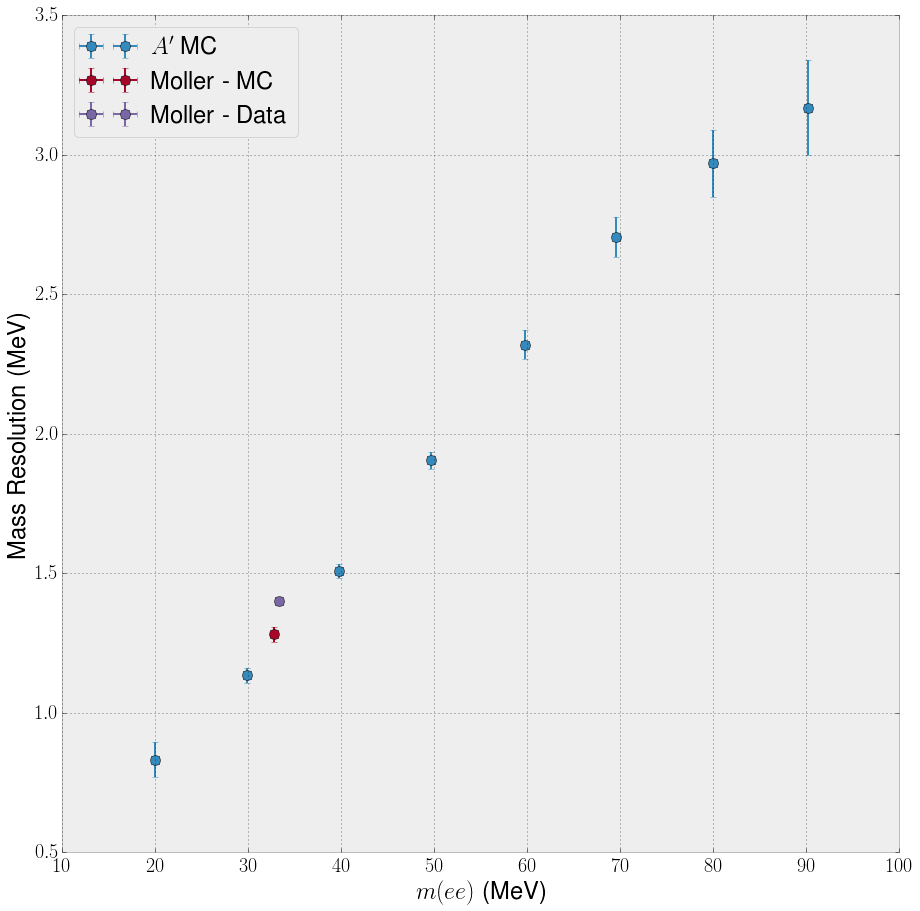

In [3]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

# Set the plot labels
ax0.set_xlabel("$m(ee)$ (MeV)")
ax0.set_ylabel("Mass Resolution (MeV)")

# Plot the mass resolutions as a function of mass
ax0.errorbar(mc_mr["mass"]*1000, mc_mr["mass_sigma"]*1000,
             xerr=mc_mr["mass_error"]*1000, yerr=mc_mr["mass_sigma_error"]*1000,
             fmt='o', markersize=10, label="$A'$ MC")
ax0.errorbar(moller_mc_mr["mass"]*1000, moller_mc_mr["mass_sigma"]*1000,
             xerr=moller_mc_mr["mass_error"]*1000, yerr=moller_mc_mr["mass_sigma_error"]*1000,
             fmt='o',markersize=10, label="Moller - MC")
ax0.errorbar(data_mr["mass"]*1000, data_mr["mass_sigma"]*1000,
             xerr=data_mr["mass_error"]*1000, yerr=data_mr["mass_sigma_error"]*1000,
             fmt='o', markersize=10, label="Moller - Data")
ax0.legend(loc=2);

Slope: 0.0351086408876 Intercept: 0.000144098844186


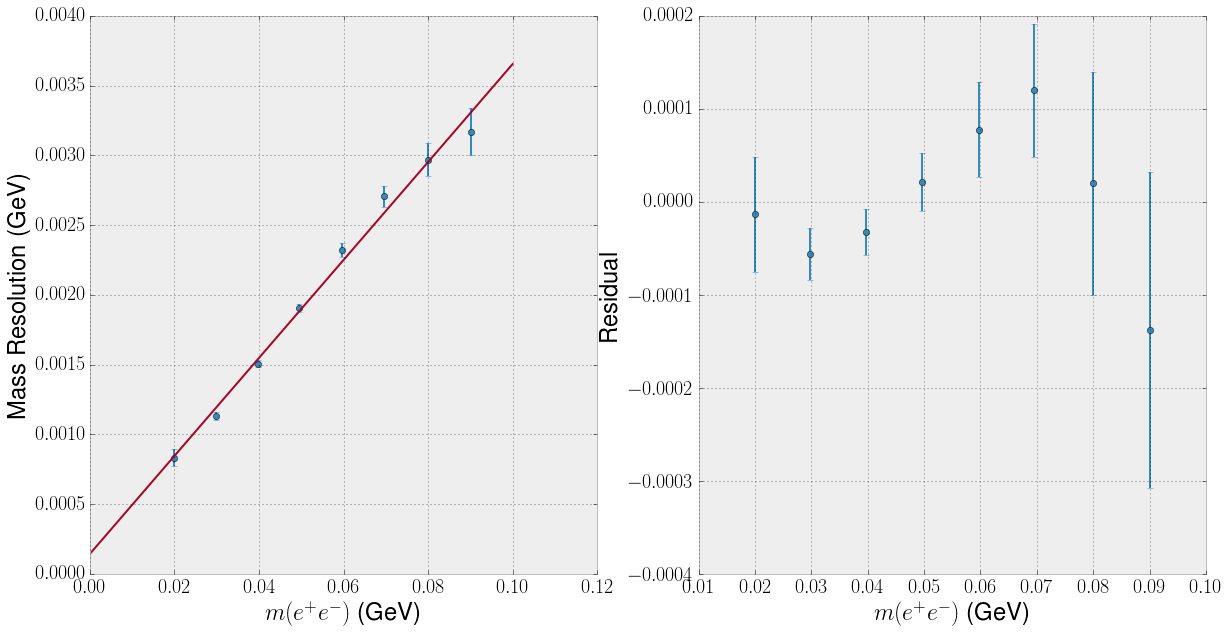

In [4]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax0.set_xlabel("$m(e^{+}e^{-})$ (GeV)")
ax0.set_ylabel("Mass Resolution (GeV)")
ax0.errorbar(mc_mr["mass"], mc_mr["mass_sigma"], xerr=mc_mr["mass_error"], yerr=mc_mr["mass_sigma_error"], fmt='o')
slope, intercept, r_value, p_value, std_err = stats.linregress(mc_mr["mass"],mc_mr["mass_sigma"])
p = np.poly1d([slope, intercept])
xp =  np.linspace(0, 0.1, 100)
ax0.plot(xp, p(xp), '-')

print "Slope: " + str(slope) + " Intercept: " + str(intercept)

residuals = mc_mr["mass_sigma"] - p(mc_mr["mass"])
ax1.errorbar(mc_mr["mass"], residuals, yerr=mc_mr["mass_sigma_error"], fmt='o');
ax1.set_xlabel("$m(e^{+}e^{-})$ (GeV)")
ax1.set_ylabel("Residual");

[-0.11146887  0.0473755  -0.00013472]


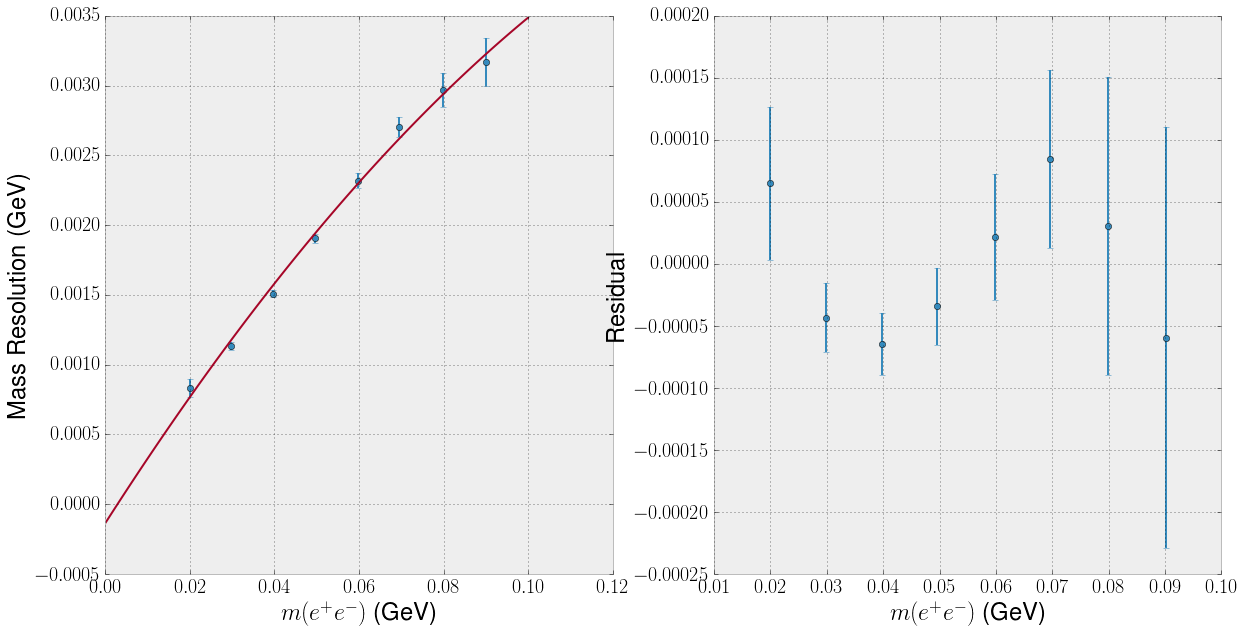

In [5]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax0.set_xlabel("$m(e^{+}e^{-})$ (GeV)")
ax0.set_ylabel("Mass Resolution (GeV)")
ax0.errorbar(mc_mr["mass"], mc_mr["mass_sigma"], xerr=mc_mr["mass_error"], yerr=mc_mr["mass_sigma_error"], fmt='o')
results = np.polyfit(mc_mr["mass"],mc_mr["mass_sigma"], 2)
p = np.poly1d(results)
xp =  np.linspace(0, 0.1, 100)
ax0.plot(xp, p(xp), '-')
print results

residuals = mc_mr["mass_sigma"] - p(mc_mr["mass"])
ax1.errorbar(mc_mr["mass"], residuals, yerr=mc_mr["mass_sigma_error"], fmt='o');
ax1.set_xlabel("$m(e^{+}e^{-})$ (GeV)")
ax1.set_ylabel("Residual");

[ -6.16555144e+00   9.06937560e-01  -2.96936354e-03   5.79408513e-04]


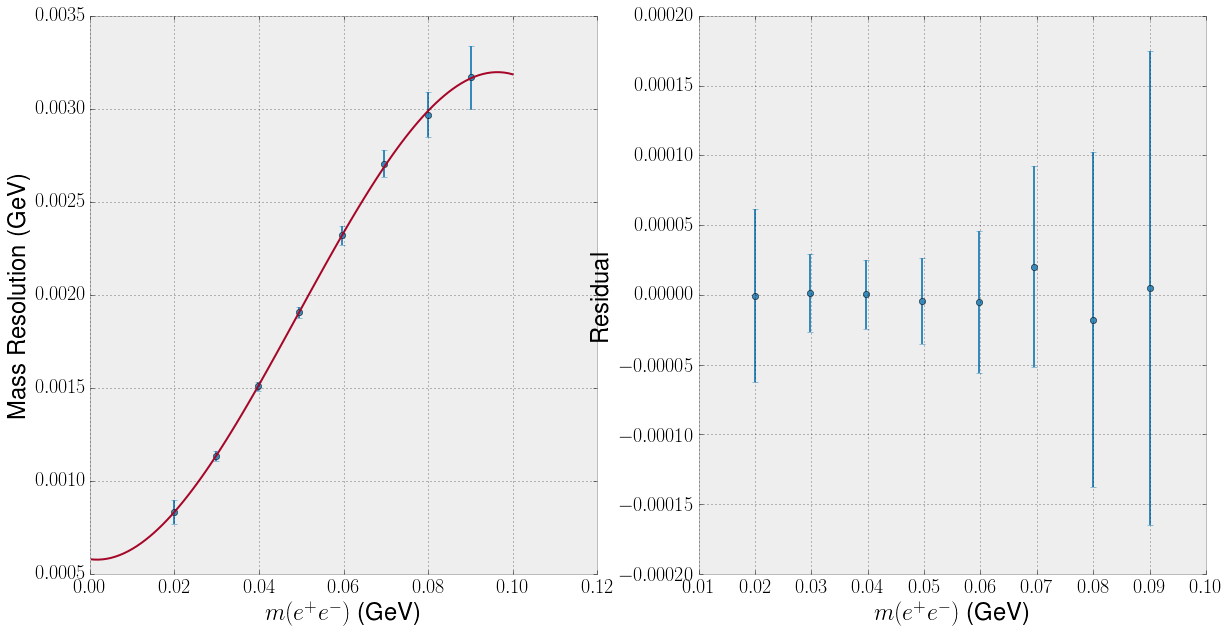

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax0.set_xlabel("$m(e^{+}e^{-})$ (GeV)")
ax0.set_ylabel("Mass Resolution (GeV)")
ax0.errorbar(mc_mr["mass"], mc_mr["mass_sigma"], xerr=mc_mr["mass_error"], yerr=mc_mr["mass_sigma_error"], fmt='o')
results = np.polyfit(mc_mr["mass"],mc_mr["mass_sigma"], 3)
p = np.poly1d(results)
xp =  np.linspace(0, 0.1, 100)
ax0.plot(xp, p(xp), '-');
print results

residuals = mc_mr["mass_sigma"] - p(mc_mr["mass"])
ax1.errorbar(mc_mr["mass"], residuals, yerr=mc_mr["mass_sigma_error"], fmt='o');
ax1.set_xlabel("$m(e^{+}e^{-})$ (GeV)")
ax1.set_ylabel("Residual");